<a href="https://colab.research.google.com/github/WilmerSoto/Ejercicio2Nov/blob/main/Modelo_KMeans_para_usuarios_de_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo KMeans para analisis de usuarios de Twitter/X**

Wilmer Santiago Soto Vidal 1003434600 <br>
Daniel Ospina 1036668605

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('usuarios-twitter.csv')

In [5]:
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [69]:
x = df.drop(columns=['usuario','ex','co','ne','categoria'])
x

,op,ag,wordcount
0,34.297953,29.370315,37.0945
1,44.986842,24.279098,78.7970
2,41.733854,34.645521,49.2604
3,40.377154,31.082154,80.4538
4,36.664677,31.138871,47.0645
...,...,...,...
135,35.569389,31.624351,47.5420
136,31.960417,40.096458,47.5625
137,71.696129,19.093548,74.3065
138,51.537405,23.008168,118.6107


In [70]:
y = df['categoria']
y

0      7
1      7
2      4
3      2
4      4
      ..
135    7
136    4
137    2
138    1
139    1
Name: categoria, Length: 140, dtype: int64

In [71]:
x2 = x.iloc[:140 , 0:3].values
y2 = y.iloc[:140].values

[Text(0.5, 0, 'Caracteristica 2'), Text(0, 0.5, 'Caracteristica 3')]

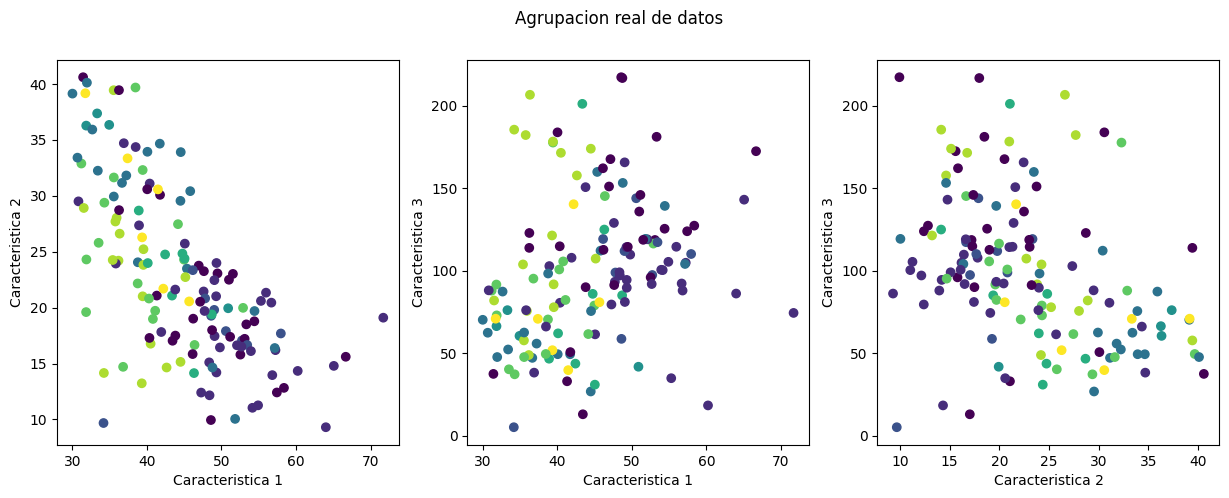

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(15,5))
fig.suptitle('Agrupacion real de datos')
ax1.scatter(x2[:,0], x2[:,1] , c=y2)
ax1.set(xlabel='Caracteristica 1', ylabel='Caracteristica 2')
ax2.scatter(x2[:,0], x2[:,2] , c=y2)
ax2.set(xlabel='Caracteristica 1', ylabel='Caracteristica 3')
ax3.scatter(x2[:,1], x2[:,2] , c=y2)
ax3.set(xlabel='Caracteristica 2', ylabel='Caracteristica 3')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow curve')

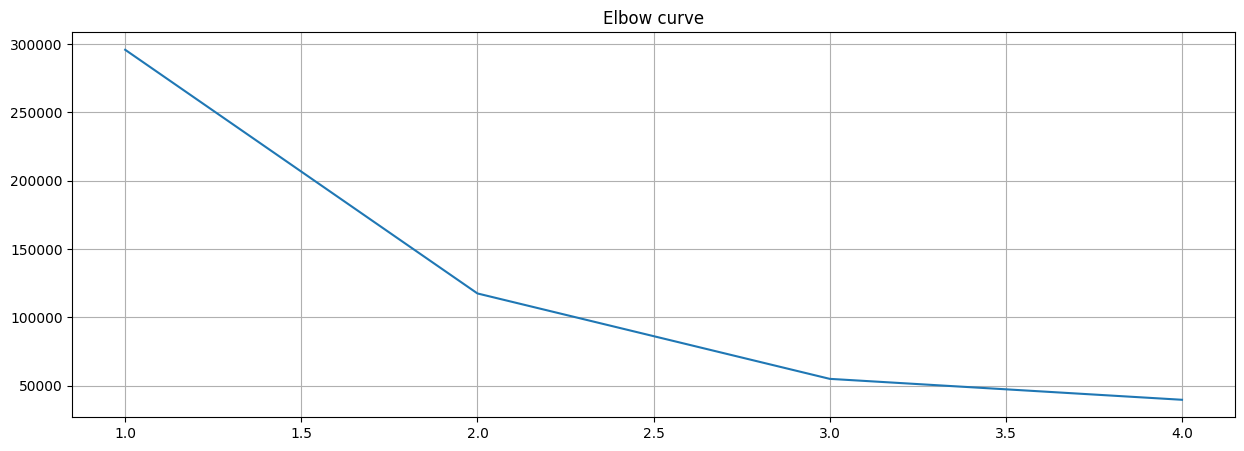

In [78]:
distorsions = []
for k in range(1,5):
  kmeans = KMeans(n_clusters = k, init='k-means++')
  kmeans.fit(x)
  distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 5), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Nuestra grafica Elbow indica que deberiamos usar un total de 2 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Text(0.5, 0, 'AG Empatia'), Text(0, 0.5, 'Wordcount # palabras')]

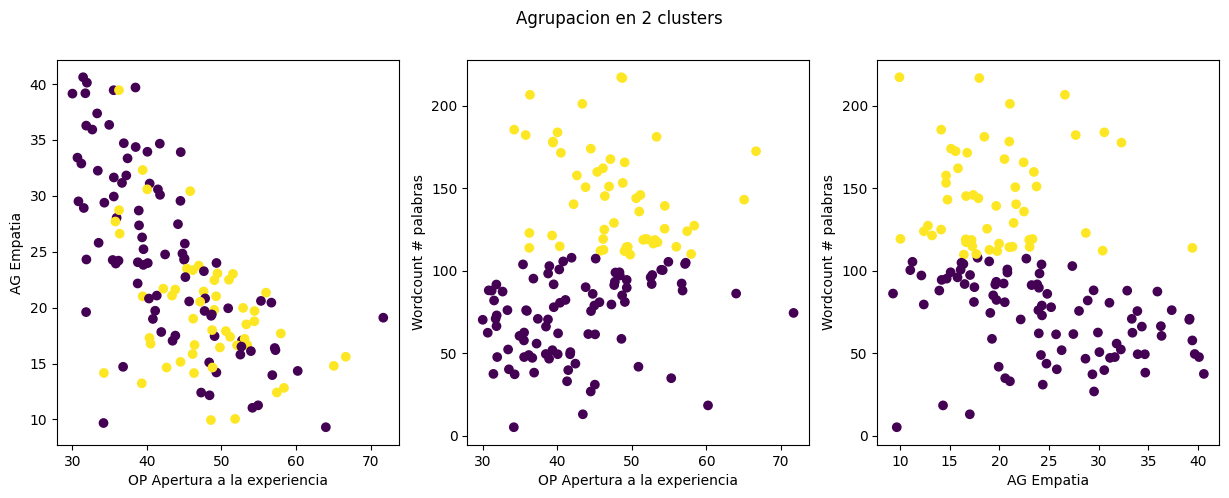

In [77]:
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans.fit(x2)
Y2_pred = kmeans.predict(x2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(15,5))
fig.suptitle('Agrupacion en 2 clusters')
ax1.scatter(x2[:,0], x2[:,1] , c=Y2_pred)
ax1.set(xlabel='OP Apertura a la experiencia', ylabel='AG Empatia')
ax2.scatter(x2[:,0], x2[:,2] , c=Y2_pred)
ax2.set(xlabel='OP Apertura a la experiencia', ylabel='Wordcount # palabras')
ax3.scatter(x2[:,1], x2[:,2] , c=Y2_pred)
ax3.set(xlabel='AG Empatia', ylabel='Wordcount # palabras')

De la grafica 3 de AG Empatia vs Wordcount # palabras, se puede ver que entre mas empatia hay en un tweet menos numero de palabras hay.

Y los tweets con mayor # de palabras, suelen tener menos empatia.